In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from read_data import get_data_df, get_data_numpy
from preprocessing import remove_missing_features, remove_repeat_patients, remove_constant_features

In [3]:
data = get_data_df()
data.shape

(101766, 50)

In [4]:
# Remove repeat patients & include new feature with number of times repeated
data = remove_repeat_patients(data, new_feature=True, return_type = 'dataframe')
data.shape

(71518, 51)

Text(0.5, 1.0, 'Records from duplicate patients')

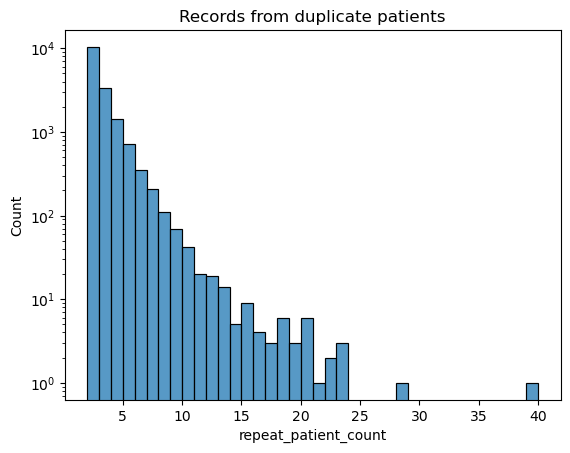

In [5]:
# Histogram of repeat patient count - how many times does each unique patient appear in the original record set?
sns.histplot(data[data.repeat_patient_count > 1], x = 'repeat_patient_count', 
             binwidth = 1, log_scale = (False, 10))
plt.title("Records from duplicate patients")

<Axes: xlabel='repeat_patient_count', ylabel='Count'>

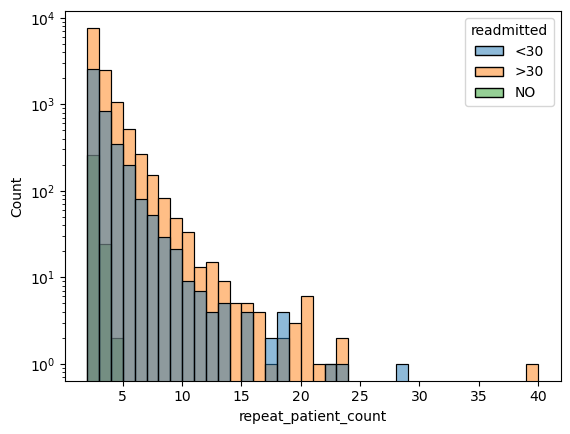

In [6]:
sns.histplot(data[data.repeat_patient_count > 1], x = 'repeat_patient_count', hue = 'readmitted',
             binwidth = 1, log_scale = (False, 10))

In [48]:
# Count % missing data in each numeric feature
n_records = data.shape[0]
data_missing = []
columns = []
for column in data:
    missing_perc = data[column].isnull().sum()/n_records
    columns.append(column)
    data_missing.append(missing_perc*100) 

In [7]:
for column in data:
    print(column + ": " + str(data[column].dtype))
    print("Number of unique values = " + str(len(data[column].unique())))
    #if(str(data[column].dtype) == 'object'):
    #    print(data[column].unique())
    #    print(sum(data[column].isna()))
    #if(str(data[column].dtype) == 'int64'):
    #    print(sum(data[column].isna()))
    #    print(sum(data[column].isnull()))
        
    print("\n")

encounter_id: int64
Number of unique values = 71518


patient_nbr: int64
Number of unique values = 71518


race: object
Number of unique values = 6


gender: object
Number of unique values = 3


age: object
Number of unique values = 10


weight: object
Number of unique values = 10


admission_type_id: int64
Number of unique values = 8


discharge_disposition_id: int64
Number of unique values = 26


admission_source_id: int64
Number of unique values = 17


time_in_hospital: int64
Number of unique values = 14


payer_code: object
Number of unique values = 18


medical_specialty: object
Number of unique values = 71


num_lab_procedures: int64
Number of unique values = 116


num_procedures: int64
Number of unique values = 7


num_medications: int64
Number of unique values = 75


number_outpatient: int64
Number of unique values = 33


number_emergency: int64
Number of unique values = 18


number_inpatient: int64
Number of unique values = 13


diag_1: object
Number of unique values = 697


d

In [10]:
print("number of columns before removing constant values = " + str(data.shape[1]))
data = remove_constant_features(data, return_type = 'dataframe')
print("number of columns after removing constant values = " + str(data.shape[1]))

number of columns before removing constant values = 51
number of columns after removing constant values = 48


In [34]:
for column in data:
    print(column + ": " + str(data[column].dtype))
    print("Number of unique values = " + str(len(data[column].unique())))
    if(str(data[column].dtype) == 'object'):
        print(data[column].unique())
        print("Number of NA values = " + str(sum(data[column].isna())))
        print("Number of null values = " + str(sum(data[column].isnull())))
    if(str(data[column].dtype) == 'int64'):
        print("Range of values = (" + str(data[column].min()) + ", " + str(data[column].max()) + ")")
        print("Number of NA values = " + str(sum(data[column].isna())))
        print("Number of null values = " + str(sum(data[column].isnull())))
        
    print("\n")

encounter_id: int64
Number of unique values = 71518
Range of values = (12522, 443867222)
Number of NA values = 0
Number of null values = 0


patient_nbr: int64
Number of unique values = 71518
Range of values = (135, 189502619)
Number of NA values = 0
Number of null values = 0


race: object
Number of unique values = 6
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
Number of NA values = 1948
Number of null values = 1948


gender: object
Number of unique values = 3
['Female' 'Male' 'Unknown/Invalid']
Number of NA values = 0
Number of null values = 0


age: object
Number of unique values = 10
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Number of NA values = 0
Number of null values = 0


weight: object
Number of unique values = 10
[nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Number of NA values = 68665
Number of null values = 68665


admission_type_id: int64
N

Number of null values = 0


chlorpropamide: object
Number of unique values = 4
['No' 'Steady' 'Down' 'Up']
Number of NA values = 0
Number of null values = 0


glimepiride: object
Number of unique values = 4
['No' 'Steady' 'Down' 'Up']
Number of NA values = 0
Number of null values = 0


acetohexamide: object
Number of unique values = 2
['No' 'Steady']
Number of NA values = 0
Number of null values = 0


glipizide: object
Number of unique values = 4
['No' 'Steady' 'Up' 'Down']
Number of NA values = 0
Number of null values = 0


glyburide: object
Number of unique values = 4
['No' 'Steady' 'Up' 'Down']
Number of NA values = 0
Number of null values = 0


tolbutamide: object
Number of unique values = 2
['No' 'Steady']
Number of NA values = 0
Number of null values = 0


pioglitazone: object
Number of unique values = 4
['No' 'Steady' 'Up' 'Down']
Number of NA values = 0
Number of null values = 0


rosiglitazone: object
Number of unique values = 4
['No' 'Steady' 'Up' 'Down']
Number of NA values 

In [23]:
# Count % missing data in each numeric feature
n_records = data.shape[0]
data_missing = []
columns = []
for column in data:
    missing_perc = data[column].isnull().sum()/n_records
    columns.append(column)
    data_missing.append(round(missing_perc*100, 2))

([], [])

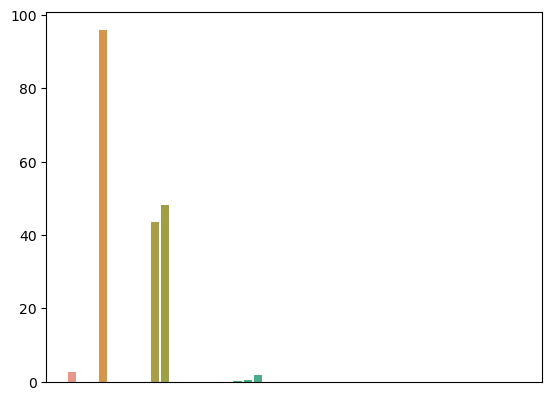

In [27]:
ax = sns.barplot(x = columns, y = data_missing)
plt.xticks([])

In [29]:
for i in range(0, len(data_missing)):
    if(data_missing[i] > 40):
        print(columns[i])
        print(data_missing[i])

weight
96.01
payer_code
43.41
medical_specialty
48.21


In [ ]:
for column in data:
    